<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


#  Multi-class Classification


Estimated time needed: **30** mins


In this lab, you will learn the different strategies of Multi-class classification and implement the same on a real-world dataset.


## **Objectives**


After completing this lab you will be able to:


1. Understand the use of one-hot encoding for categorical variables.
2. Implement logistic regression for multi-class classification using **One-vs-All (OvA)** and **One-vs-One (OvO)** strategies.
3. Evaluate model performance using appropriate metrics.


## Import Necessary Libraries


First, to ensure the availability of the required libraries, execute the cell below.


In [32]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

Now, import the necessary libraries for data processing, model training, and evaluation.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## About the dataset
The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The data set has 17 attributes in total along with 2,111 samples. 

The attributes of the dataset are descibed below.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


### Load the dataset

Load the data set by executing the code cell below.


In [34]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis


Visualize the distribution of the target variable to understand the class balance.


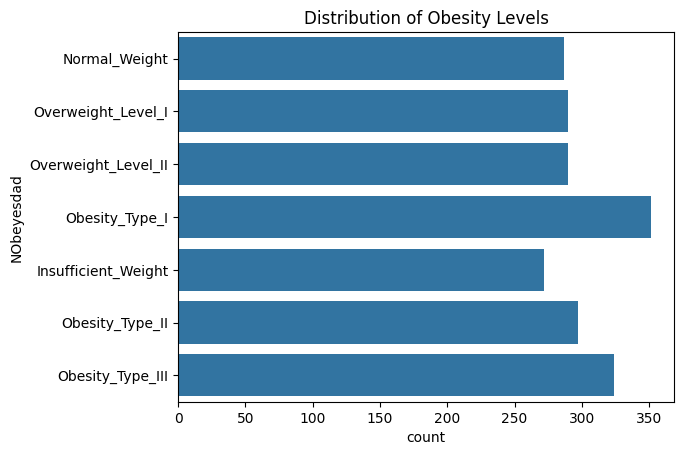

In [35]:
# Distribution of target variable
sns.countplot(y='NObeyesdad', data=data)
plt.title('Distribution of Obesity Levels')
plt.show()

This shows that the dataset is fairly balanced and does not require any special attention in terms of biased training.


### Exercise 1
Check for null values, and display a summary of the dataset (use `.info()` and `.describe()` methods).


In [36]:
print(data.isnull().sum())

print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

<details><summary>Click here for the solution</summary>

```python
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())
```
</details>


Expected Output:

* Counts of null values for each column (likely zero for this dataset).
* Dataset info including column names, data types, and memory usage.
* Descriptive statistics for numerical columns.


## Preprocessing the data


### Feature scaling
Scale the numerical features to standardize their ranges for better model performance.


In [37]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
print(continuous_columns)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [38]:
scaled_data.head()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625


Standardization of data is important to better define the decision boundaries between classes by making sure that the feature variations are in similar scales. The data is now ready to be used for training and testing.


### One-hot encoding
Convert categorical variables into numerical format using one-hot encoding.


In [39]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column
print(categorical_columns)

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [40]:
encoded_df.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [41]:
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


You will observe that all the categorical variables have now been modified to one-hot encoded features. This increases the overall number of fields to 24. 


### Encode the target variable


In [42]:
# Encoding the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Separate the input and target data


In [43]:
# Preparing final dataset
X = prepped_data.drop('NObeyesdad', axis=1)
y = prepped_data['NObeyesdad']

## Model training and evaluation 


### Splitting the data set
Split the data into training and testing subsets.


In [44]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression with One-vs-All
In the One-vs-All approach:

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.


Train a logistic regression model using the One-vs-All strategy and evaluate its performance.

In [45]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

You can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [46]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic Regression with OvO

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.


Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.


In [47]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

Evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [48]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


### Exercises


Q1. Experiment with different test sizes in the train_test_split method (e.g., 0.1, 0.3) and observe the impact on model performance.


In [49]:
test_sizes = [0.1, 0.3]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
    model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)

    # Evaluation metrics for OvO
    print(f"Test size: {test_size}")
    print(f"Accuracy: {np.round(100 * accuracy_score(y_test, y_predict), 2)}%")

Test size: 0.1
Accuracy: 92.45%
Test size: 0.3
Accuracy: 92.43%


<details><summary>Click here for the solution</summary>

```python
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
```
</details>


Q2. Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model. Also try for the One vs One model.


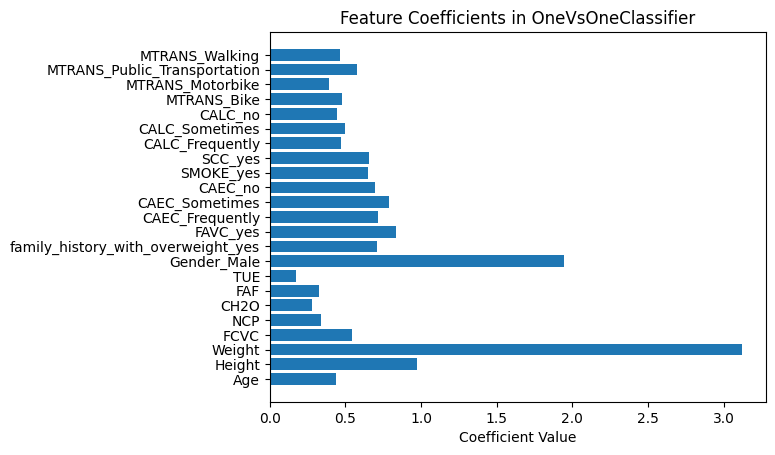

In [50]:
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Coefficients in OneVsOneClassifier")
plt.xlabel("Coefficient Value")
plt.show()

<details><summary>Click here for the solution</summary>

```python
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
```

For One vs One, change `model_ova` to `model_ovo` in the code above.
</details>


Q3. Write a function `obesity_risk_pipeline` to automate the entire pipeline: <br>
<ol>
<li> Loading and preprocessing the data </li>
<li> Training the model </li>
<li> Evaluating the model </li>
</ol>
The function should accept the file path and test set size as the input arguments.


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def split_cols(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
    return numeric_cols, categorical_cols


def obesity_risk_pipeline(data_path, test_size):
    data = pd.read_csv(data_path)
    
    label_col = "NObeyesdad"

    data['NObeyesdad'] = data['NObeyesdad'].astype('category').cat.codes
    
    X = data.drop(label_col, axis=1)
    y = data[label_col].copy()

    num_cols, cat_cols = split_cols(X)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
    
    # pipeline para pré-processamento das variáveis categóricas
    cat_pipeline = Pipeline([
        ('onehot', OneHotEncoder(sparse_output=False, drop='first'))
    ])
    
    # Compondo os pré-processadores
    preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols),
    ])
    
    # criando o modelo usando pipeline
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('ovo', OneVsOneClassifier(LogisticRegression(multi_class='multinomial', max_iter=1000)))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # X_train passa por todo o pipeline antes de fit() ser chamado 
    model.fit(X_train, y_train)

    # Antes de fazer a predição, X_test tambem passa por toda a pipeline
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

    
obesity_risk_pipeline(file_path, test_size=0.2)

Accuracy: 0.9479905437352246


In [53]:
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

obesity_risk_pipeline(file_path, test_size=0.2)

Accuracy: 0.8794326241134752


<details><summary>Click here for the solution</summary>

```python
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
```
</details>


### Congratulations! You're ready to move on to your next lesson!
 
## Author
 
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abishek Gagneja</a>
 
 
 ### Other Contributors
 
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>



<!--
## Changelog
 
| Date | Version | Changed by | Change Description |

|:------------|:------|:------------------|:---------------------------------------|

| 2024-11-05 | 1.0  Abhishek Gagnejan    | Fresh version created |
 


<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
